In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#import cufflinks as cf
#import plotly.graph_objs as go 
#from plotly.offline import init_notebook_mode,plot,iplot
#cf.go_offline()
#init_notebook_mode(connected=True)
%matplotlib inline

In [19]:
df=pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [20]:
df = df[["main_category","usd_goal_real","country","backers","state","usd_pledged_real"]]
df.head()

,main_category,usd_goal_real,country,backers,state,usd_pledged_real
0,Publishing,1533.95,GB,0,failed,0.0
1,Film & Video,30000.00,US,15,failed,2421.0
2,Film & Video,45000.00,US,3,failed,220.0
3,Music,5000.00,US,1,failed,1.0
4,Film & Video,19500.00,US,14,canceled,1283.0


In [21]:
df.describe()

,usd_goal_real,backers,usd_pledged_real
count,3.786610e+05,378661.000000,3.786610e+05
mean,4.545440e+04,105.617476,9.058924e+03
std,1.152950e+06,907.185035,9.097334e+04
min,1.000000e-02,0.000000,0.000000e+00
25%,2.000000e+03,2.000000,3.100000e+01
50%,5.500000e+03,12.000000,6.243300e+02
75%,1.550000e+04,56.000000,4.050000e+03
max,1.663614e+08,219382.000000,2.033899e+07


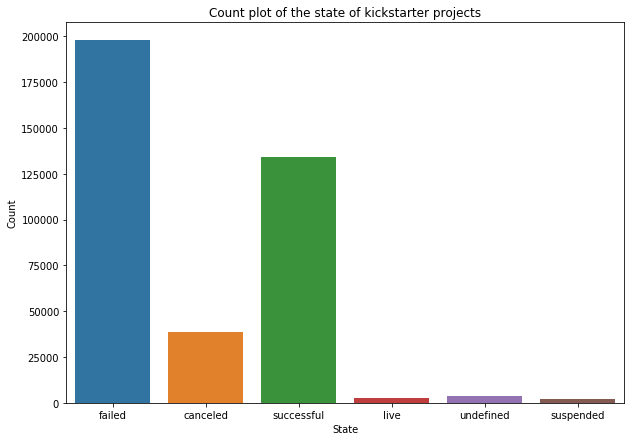

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(df['state'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count plot of the state of kickstarter projects')

In [23]:
df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined', 'suspended'], dtype=object)

In [24]:
df = df[(df["state"] != "live")&(df["state"] != "undefined")&(df["state"] != "suspended")]
df["state"].unique()

array(['failed', 'canceled', 'successful'], dtype=object)

In [25]:
df["state"] = np.where((df["state"] == "canceled"),"failed",df["state"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370454 entries, 0 to 378660
Data columns (total 6 columns):
main_category       370454 non-null object
usd_goal_real       370454 non-null float64
country             370454 non-null object
backers             370454 non-null int64
state               370454 non-null object
usd_pledged_real    370454 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.8+ MB


In [26]:
dfsuccess = df[df['state']=='successful']
dffail = df[df['state']=='failed']

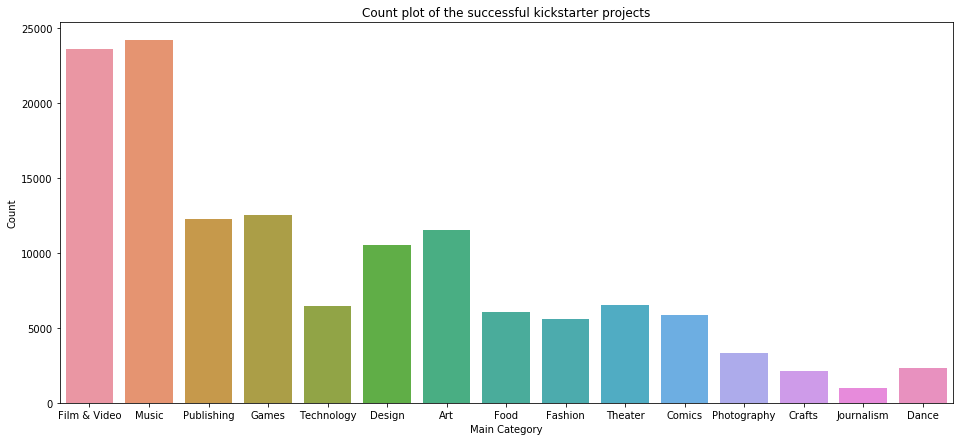

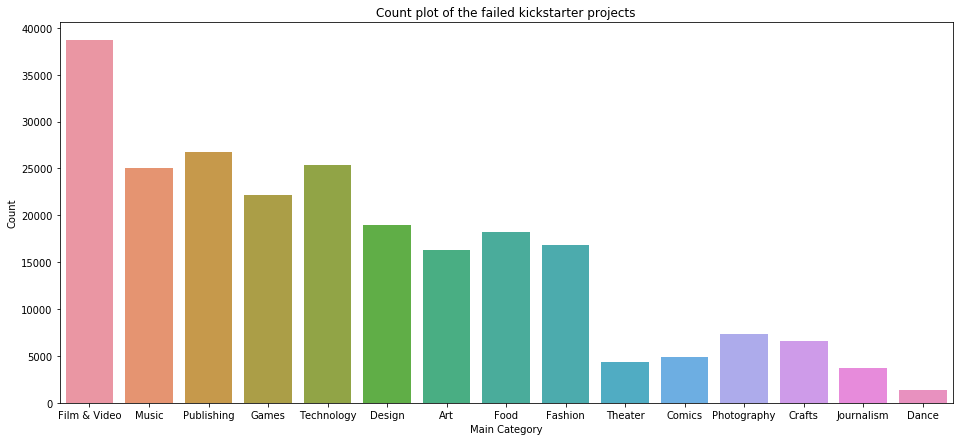

In [27]:
plt.figure(figsize=(16,7))
sns.countplot(dfsuccess['main_category'],order=df['main_category'].value_counts().index)
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count plot of the successful kickstarter projects')

plt.figure(figsize=(16,7))
sns.countplot(dffail['main_category'],order=df['main_category'].value_counts().index)
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.title('Count plot of the failed kickstarter projects')

In [28]:
df1=df.groupby(('main_category','state')).size().unstack().fillna(0)
df1=df1.divide(df1.iloc[:,:].sum(axis=1),axis=0)*100
print(df1.sort_values(by='successful',ascending=False))

state             failed  successful
main_category                       
Dance          37.419700   62.580300
Theater        39.778802   60.221198
Comics         45.503731   54.496269
Music          50.873026   49.126974
Art            58.690737   41.309263
Film & Video   62.070903   37.929097
Games          63.948968   36.051032
Design         64.256674   35.743326
Publishing     68.499501   31.500499
Photography    69.039813   30.960187
Food           74.922728   25.077272
Fashion        75.059086   24.940914
Crafts         75.580187   24.419813
Journalism     78.339041   21.660959
Technology     79.745002   20.254998


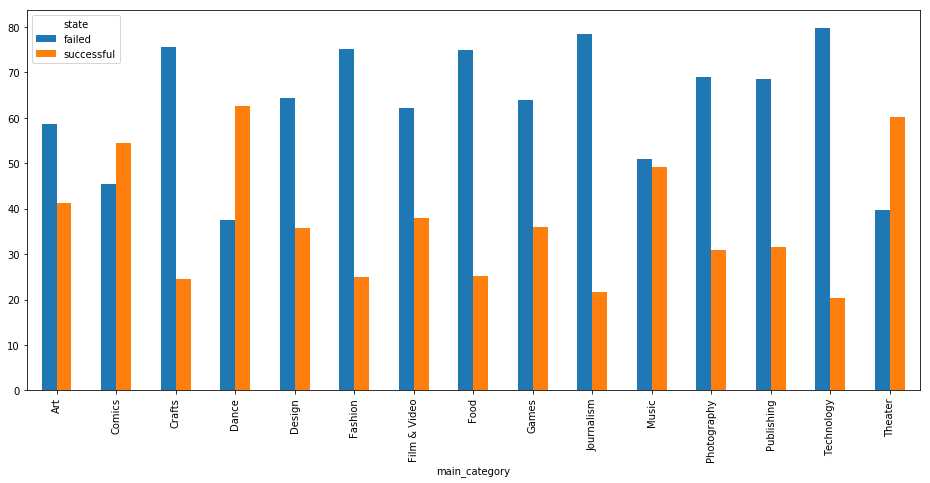

In [29]:
df1.plot(kind="bar",figsize=(16,7))

In [30]:
df.groupby(('main_category'))['backers'].sum().sort_values(ascending=False)

main_category
Games           11304754
Design           7130876
Technology       5201257
Film & Video     4190762
Music            2700566
Publishing       2217571
Comics           1453945
Fashion          1388135
Food             1320109
Art              1180804
Theater           512364
Photography       426071
Crafts            239297
Journalism        181103
Dance             161012
Name: backers, dtype: int64

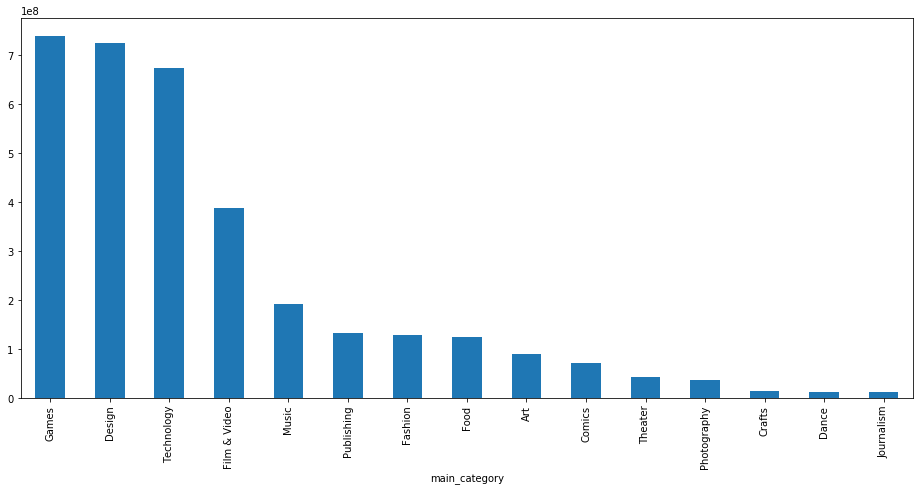

In [31]:
pled = df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending=False)
pled.plot(kind="bar",figsize=(16,7))

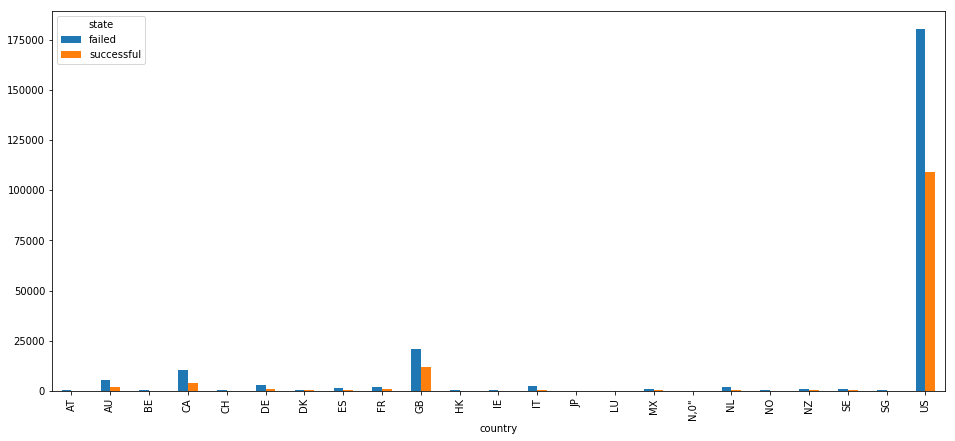

In [32]:
dfcountry=df.groupby(('country','state')).size().unstack()
dfcountry.plot(kind="bar",figsize=(16,7))

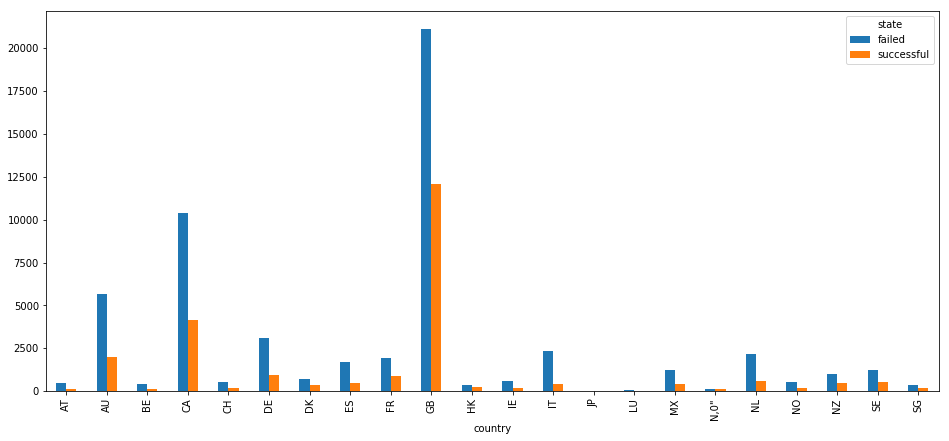

In [33]:
dfcountry_exceptUS = dfcountry[dfcountry.index != "US"]
dfcountry_exceptUS.plot(kind="bar",figsize=(16,7))

# Test 1: Country and state

#### Null Hypothesis: Success rate changes depend on the country
#### Alternative Hypothesis: Success rate changes does not depend on the country

In [34]:
df["state"] = np.where((df["state"] == "successful"),1,0)
countryGrouped = pd.DataFrame(df["state"].groupby(df["country"]).mean())
countryGrouped

,state
country,
AT,0.185764
AU,0.261685
BE,0.254606
CA,0.284946
CH,0.254076
DE,0.230959
DK,0.332410
ES,0.223230
FR,0.316046


In [35]:
df.state.mean()

0.36159955082142453

In [36]:
countryGrouped["Expected"] = np.where((countryGrouped["state"] < df.state.mean()),0,1)
expectedCountry = (countryGrouped["Expected"]).append(countryGrouped["Expected"])

In [52]:
countrytest = df[["country","state"]]
y = pd.DataFrame(countrytest.groupby([countrytest.state,countrytest.country]).size())
y["Expected"] = expectedCountry.values

y = y.reset_index(level=["state","country"])
y = y.drop("country",axis=1)

### State and Country

In [40]:
groupbycountry = pd.DataFrame(y.groupby([y.state,y.Expected]).sum())
groupbycountry

0
state Expected        
0     0          34503
      1         201995
1     0          12269
      1         121687

In [41]:
arr = np.array([[groupbycountry[0][1][0],groupbycountry[0][0][0]],[groupbycountry[0][1][1],groupbycountry[0][0][1]]])
arr

array([[ 12269,  34503],
       [121687, 201995]])

In [42]:
chi_stats = stats.chi2_contingency(arr)

#(t,p)= stats.chisquare([chitest["state"],chitest["goalClf"]],ddof=5)
print("Test t=%f p-value=%f" % (chi_stats[0],chi_stats[1]))

Test t=2285.335205 p-value=0.000000


In [43]:
alpha = 0.05  # significance level 

In [44]:
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

3.8414588206941236

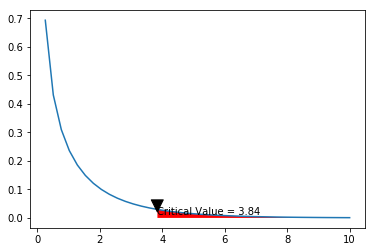

In [51]:
x = np.linspace(0, 10, 40)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

## Result

### According to shown attributes we can suggest that country does not have a strong affect on state

#     
#   
# Test 2: Category and state
#   
#### Null Hypothesis: Success rate changes depend on the category
#### Alternative Hypothesis: Success rate changes does not depend on the category

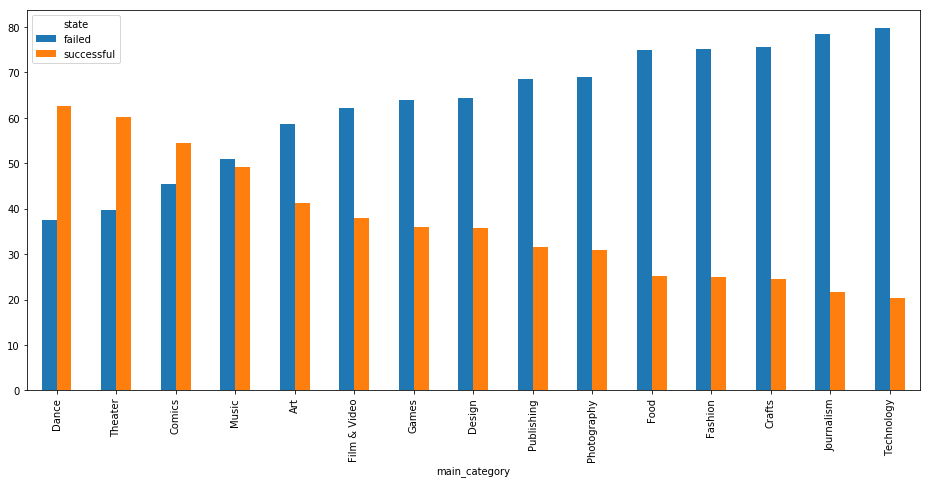

In [56]:
category = df1.sort_values(by='successful',ascending=False)
category.plot(kind="bar",figsize=(16,7))

#### Even though the number of projects in Dance category is lower than others, we can suggest that it is more successful in ratio
#   
#   
## Result
##   
### As we can see in the above graph, category has a affect on success rate
### So, as our null hypthosesis stated category has correlation with success rate and the graph above corrects
### the statement.
